### Importing necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
import seaborn as sns

### Loading data

In [3]:
pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Data description

In [4]:
data = datasets.load_iris()
features = data.data
target = data.target
features = pd.DataFrame(features, columns= data.feature_names[:])
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
columns = features.columns
columns = list(columns)
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
[features.isnull()[columns[i]].unique() for i in range(0, len(columns))]

[array([False]), array([False]), array([False]), array([False])]

### Data visualization

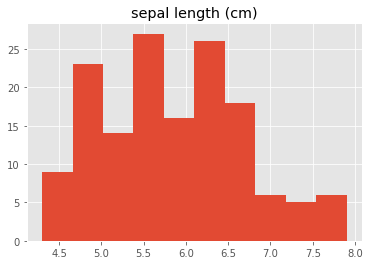

In [7]:
plt.style.use("ggplot")
plt.hist(features.iloc[:,0])
plt.title(data.feature_names[0])
plt.show()

<AxesSubplot:ylabel='Frequency'>

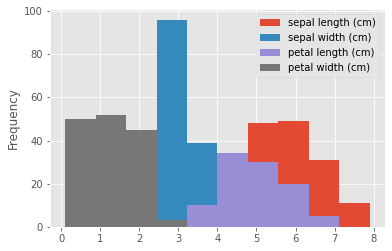

In [8]:
pd.DataFrame(features).plot(kind="hist")

In [10]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


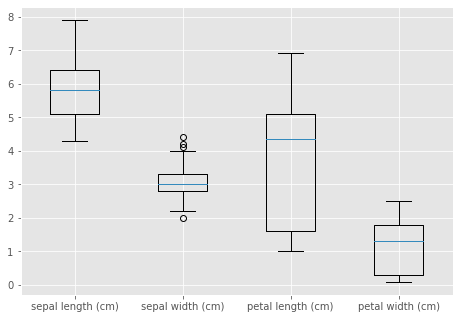

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.boxplot(data.data)
ax.set_xticklabels(data.feature_names)
plt.show()

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_12465/3654861765.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.feature_names)


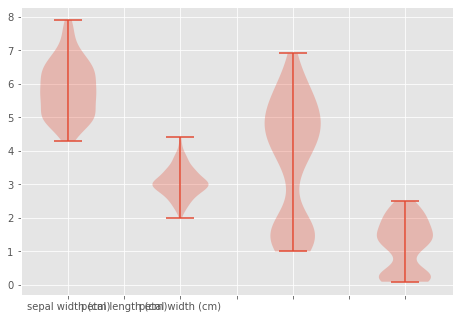

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.violinplot(data.data)
ax.set_xticklabels(data.feature_names)
plt.show()

In [53]:
pd.DataFrame(features).plot(kind="violinplot")

ValueError: violinplot is not a valid plot kind

In [13]:
d = pd.Series(target).value_counts()
list(d)

[50, 50, 50]

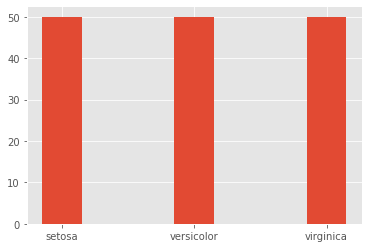

In [14]:
ff = ['setosa', 'versicolor', 'virginica']
plt.bar(ff, d, width = 0.3)
plt.show()

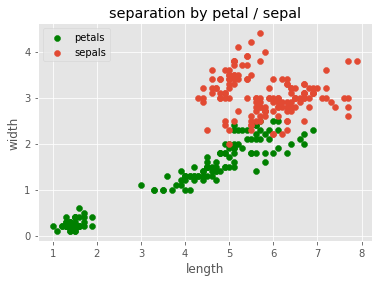

In [15]:
plt.scatter(features.iloc[:,2], features.iloc[:,3], color="green")
plt.scatter(features.iloc[:,0], features.iloc[:,1])
plt.xlabel("length")
plt.ylabel("width")
plt.legend(labels=["petals", "sepals"])
plt.title("separation by petal / sepal")
plt.show()

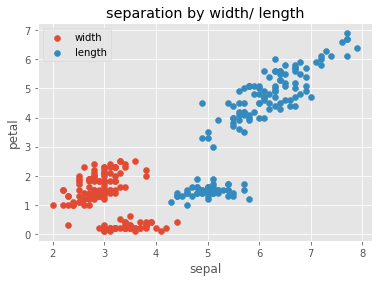

In [16]:
plt.scatter(features.iloc[:,1], features.iloc[:,3])
plt.scatter(features.iloc[:,0], features.iloc[:,2])
plt.xlabel("sepal")
plt.ylabel("petal")
plt.legend(labels=["width", "length"])
plt.title("separation by width/ length")
plt.show()

In [17]:
total = pd.concat([features, pd.Series(target)], axis=1)

In [18]:
total = pd.DataFrame(total)
total

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
first = pd.DataFrame(total[total.iloc[:,-1] == 0])
second = pd.DataFrame(total[total.iloc[:,-1] == 1])
third = pd.DataFrame(total[total.iloc[:,-1] == 2])

In [20]:
pd.DataFrame(first).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[]

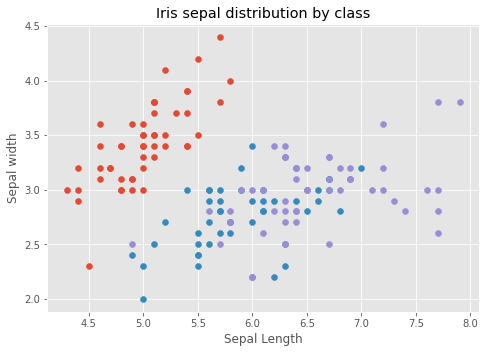

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(first.iloc[:,0], first.iloc[:,1])
ax.scatter(second.iloc[:,0], second.iloc[:,1])
ax.scatter(third.iloc[:,0], third.iloc[:,1])
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal width")
ax.set_title("Iris sepal distribution by class")
plt.plot()

[]

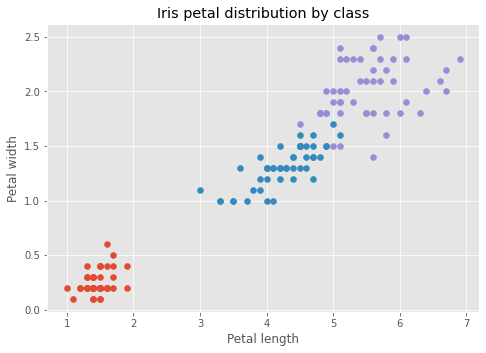

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(first.iloc[:,2], first.iloc[:,3])
ax.scatter(second.iloc[:,2], second.iloc[:,3])
ax.scatter(third.iloc[:,2], third.iloc[:,3])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
ax.set_title("Iris petal distribution by class")
plt.plot()

From observation we can see that it is easy to separate the flowers into classes based on their petal width and length than by their sepal width and length

[]

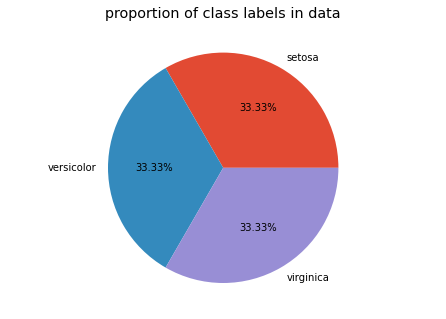

In [23]:
fig = plt.figure()
ff = ['setosa', 'versicolor', 'virginica']
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.set_title("proportion of class labels in data")
ax.pie(d, labels=ff, autopct= '%1.2f%%')
plt.plot()

There are a total of 150 samples of the flowers with each class being represented by 50 samples.

In [24]:
total.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
0,0.782561,-0.426658,0.949035,0.956547,1.000000


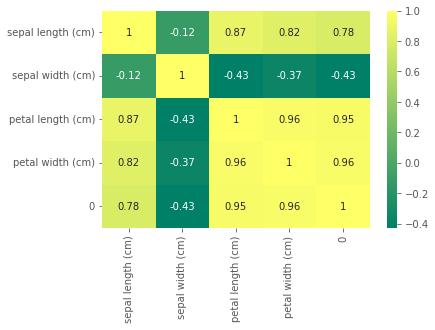

In [25]:
sns.heatmap(total.corr(), annot=True, cmap="summer")
plt.show()

Sepal width has the lowest correlation with the target variables
While petal width has the most correlation which is consistent with the results of our previous analysis.

In [26]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
features = sc.fit_transform(features)

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
target = enc.fit_transform(target)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
#target = pd.get_dummies(target)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(features,  target, random_state = 2)

### Test multiple classifiers

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
seed = 2
knn = KNeighborsClassifier()
svc = SVC(random_state=seed)
gbc = GradientBoostingClassifier(random_state=seed)
rfc = RandomForestClassifier(random_state=seed)
lgc = LogisticRegression(random_state=seed)
models = [("knn",knn), ("svc", svc), ("gbc",gbc), ("rfc",rfc), ("lgc",lgc)]

In [32]:
results = []
names = []
cm = []
for model in models:
    model[1].fit(xtrain, ytrain)
    pred = model[1].predict(xtest)
    acc = accuracy_score(ytest, pred)
    cmm = confusion_matrix(ytest, pred)
    results.append(acc)
    names.append(model[0])
    cm.append(cmm)
for a, b, c in zip(names, results, cm):
    print(a + ": " + str(b) + "\n", c, "\n")
    

knn: 0.9736842105263158
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]] 

svc: 0.9736842105263158
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]] 

gbc: 0.9473684210526315
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]] 

rfc: 0.9736842105263158
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]] 

lgc: 0.9473684210526315
 [[15  1  0]
 [ 0 10  1]
 [ 0  0 11]] 



### Running the same algorithms with the sepal width column removed

lets check if our model will improve in performance if we remove the sepal width column since it has little correlation with the target variable

In [33]:
total.drop(columns="sepal width (cm)", inplace=True)

In [34]:
total

,sepal length (cm),petal length (cm),petal width (cm),0
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(total.iloc[:,0:3],  total.iloc[:,3], random_state = 2)

In [36]:
results = []
names = []
cm = []
for model in models:
    model[1].fit(xtrain, ytrain)
    pred = model[1].predict(xtest)
    acc = accuracy_score(ytest, pred)
    cmm = confusion_matrix(ytest, pred)
    results.append(acc)
    names.append(model[0])
    cm.append(cmm)
for a, b, c in zip(names, results, cm):
    print(a + ": " + str(b) + "\n", c, "\n")

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


knn: 1.0
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

svc: 0.9473684210526315
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]] 

gbc: 0.9473684210526315
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]] 

rfc: 0.9736842105263158
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]] 

lgc: 0.9736842105263158
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]] 



the knn classifier produced the best result, with an accuracy  of 1.0 and a very good configuration of the confusion matrix